In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('/home/shraddha/Downloads/solar_dataset/output.txt', sep='\t',
                       names=('date_time_cst','date_time_utc','normalize15','zipcode','rdng_dtmgmt','main_adr_zip_cd_5', 
                             'received_energy_kwh','delivered_energy_kwh','capacity'))
df = pd.DataFrame(df)
print(df.head(10))


/home/shraddha/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         date_time_cst        date_time_utc  normalize15  zipcode  \
0        date_time_cst        date_time_utc  normalize15  zipcode   
1  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0006    75019   
2  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0107    75075   
3  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0165    75093   
4  2017-01-01 07:00:00  2017-01-01 13:00:00       0.0321    76063   
5  2017-01-01 07:00:00  2017-01-01 13:00:00        0.042    78717   
6  2017-01-01 07:00:00  2017-01-01 13:00:00       0.1358    78664   
7  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0006    75019   
8  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0126    75075   
9  2017-01-01 07:15:00  2017-01-01 13:15:00       0.0214    76063   

           rdng_dtmgmt  main_adr_zip_cd_5  received_energy_kwh  \
0          rdng_dtmgmt  main_adr_zip_cd_5  received_energy_kwh   
1  2017-01-01 13:00:00              75019                0.000   
2  2017-01-01 13:00:00              75075 

In [3]:
df = pd.DataFrame(df[['date_time_cst' , 'normalize15' , 'zipcode' ,'received_energy_kwh']])
print(df[1::].head(10))

          date_time_cst normalize15 zipcode received_energy_kwh
1   2017-01-01 07:00:00      0.0006   75019               0.000
2   2017-01-01 07:00:00      0.0107   75075               0.993
3   2017-01-01 07:00:00      0.0165   75093               0.276
4   2017-01-01 07:00:00      0.0321   76063               0.731
5   2017-01-01 07:00:00       0.042   78717               0.000
6   2017-01-01 07:00:00      0.1358   78664               1.628
7   2017-01-01 07:15:00      0.0006   75019               0.000
8   2017-01-01 07:15:00      0.0126   75075               1.024
9   2017-01-01 07:15:00      0.0214   76063               0.757
10  2017-01-01 07:15:00      0.0223   75093               0.284


In [4]:
df[['date_time_cst','normalize15','zipcode' , 'received_energy_kwh']].isna().sum()

date_time_cst               0
normalize15                 0
zipcode                     0
received_energy_kwh    358820
dtype: int64

In [5]:
df.shape

(1138317, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138317 entries, 0 to 1138316
Data columns (total 4 columns):
date_time_cst          1138317 non-null object
normalize15            1138317 non-null object
zipcode                1138317 non-null object
received_energy_kwh    779497 non-null object
dtypes: object(4)
memory usage: 34.7+ MB


In [7]:
df['zipcode'].value_counts(())

76063      81193
78660      76868
78633      67550
76182      62700
78681      62190
75025      59516
78717      58507
78728      58236
75075      57826
78621      57166
76087      56985
76126      56413
78664      55965
76108      55208
76060      53315
75093      51688
75019      51037
75023      50418
76060       3900
76063       3834
76087       3828
75025       3759
78717       3722
75075       3712
78681       3683
75093       3626
78728       3620
78621       3577
78633       3577
78660       3568
78664       3567
76182       3532
76126       3531
75019       3504
75023       3501
76108       3494
zipcode        1
Name: zipcode, dtype: int64

In [8]:
df = df.drop(df.index[0])
received_energy_produced = df[df['received_energy_kwh'].notnull()]
received_energy_produced

,date_time_cst,normalize15,zipcode,received_energy_kwh
1,2017-01-01 07:00:00,0.0006,75019,0.000
2,2017-01-01 07:00:00,0.0107,75075,0.993
3,2017-01-01 07:00:00,0.0165,75093,0.276
4,2017-01-01 07:00:00,0.0321,76063,0.731
5,2017-01-01 07:00:00,0.042,78717,0.000
...,...,...,...,...
779492,2019-01-31 17:45:00,0.0048,76108,0
779493,2019-01-31 17:45:00,0.0053,75075,0.032
779494,2019-01-31 17:45:00,0.0081,78621,0.416
779495,2019-01-31 17:45:00,0.0123,76087,0


In [9]:
df = df.drop(df.index[0])
received_energy_null = df[df['received_energy_kwh'].isnull()]
received_energy_null

,date_time_cst,normalize15,zipcode,received_energy_kwh
779497,2019-01-31 18:00:00,0,78681,NaN
779498,2019-01-31 18:00:00,0,78728,NaN
779499,2019-01-31 18:00:00,0.0001,75025,NaN
779500,2019-01-31 18:00:00,0.0002,75023,NaN
779501,2019-01-31 18:00:00,0.0002,75075,NaN
...,...,...,...,...
1138312,2019-12-31 23:45:00,0.0923,78681,NaN
1138313,2019-12-31 23:45:00,0.365,78660,NaN
1138314,2020-01-01 00:00:00,0.0435,76063,NaN
1138315,2020-01-01 00:00:00,0.0923,78681,NaN


In [10]:
df.fillna('0').shape

(1138315, 4)

In [11]:
# print('#####')
# plt.scatter(df['date_time_cst'],df['normalize15'],marker="o", c='colors' , alpha = 0.5)
# plt.show()
# print('@@@@@@')
print(df.keys)

<bound method NDFrame.keys of                date_time_cst normalize15 zipcode received_energy_kwh
2        2017-01-01 07:00:00      0.0107   75075               0.993
3        2017-01-01 07:00:00      0.0165   75093               0.276
4        2017-01-01 07:00:00      0.0321   76063               0.731
5        2017-01-01 07:00:00       0.042   78717               0.000
6        2017-01-01 07:00:00      0.1358   78664               1.628
...                      ...         ...     ...                 ...
1138312  2019-12-31 23:45:00      0.0923   78681                 NaN
1138313  2019-12-31 23:45:00       0.365   78660                 NaN
1138314  2020-01-01 00:00:00      0.0435   76063                 NaN
1138315  2020-01-01 00:00:00      0.0923   78681                 NaN
1138316  2020-01-01 00:00:00       0.365   78660                 NaN

[1138315 rows x 4 columns]>


In [12]:
# pip3 install -U scikit-learn
# from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
df = df.replace(np.nan, 0)
train , test = train_test_split(df,test_size = 0.07)
print(train)
print(test)

              date_time_cst normalize15 zipcode received_energy_kwh
174432  2017-07-05 08:00:00      0.0612   78633                   0
565523  2018-07-01 18:15:00      0.2387   78633                   0
413455  2018-02-20 12:15:00      0.0476   75023               0.834
427584  2018-03-07 07:15:00       0.015   76060                   0
753497  2019-01-04 16:30:00      0.1168   75023              15.061
...                     ...         ...     ...                 ...
65388   2017-03-20 14:00:00      0.7816   75025              80.860
44472   2017-02-24 18:15:00      0.0228   78664               1.866
127256  2017-05-21 15:15:00      0.6898   75093               7.573
274245  2017-10-04 15:15:00      0.3573   75023              22.358
822095  2019-03-17 09:45:00      0.3693   76108                   0

[1058632 rows x 4 columns]
               date_time_cst normalize15 zipcode received_energy_kwh
1096287  2019-11-16 10:15:00      0.6426   78633                   0
362059   2017-12-3

In [16]:
# import datetime as dt
# df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
# df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# df = df.round(df[['normalize15'  , 'receiived_energy_kwh']]  ,  5)
# df.head(10)

In [17]:
# df.dropna(how=all)

In [18]:
# x_train , x_test , y_train , y_test = train_test_split(df,df['received_energy_kwh'], test_size = 1/3)
# print('*********8')
# x_test.fillna(x_train.mean(), inplace=True)
# print('@@@@@@@@@@@@@@@@@@@@@')
# lr = LinearRegression()

# print('@@@%%%%%%%%%%%%%%')
# df  = df.reset_index(drop =True)

# lr.fit(x_train, y_train)
# print('@@@@@@')


In [19]:
import datetime as dt
df['date_time_cst'] = pd.to_datetime(df['date_time_cst'])
df['date_time_cst']=df['date_time_cst'].map(dt.datetime.toordinal)
# lin_reg_mod.fit(X_train, y_train)
# print('%%%%%')

In [20]:
X = pd.DataFrame(np.c_[df[['date_time_cst' , 'normalize15' , 'zipcode']]]  , columns=['date_time_cst','normalize15','zipcode'])
y = df['received_energy_kwh']


X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 1/3  , random_state = 9)


print(X_train , X_test , y_train , y_test)



        date_time_cst normalize15 zipcode
924098         737225      0.6889   76182
1115375        737399      0.1791   78660
1129165        737414      0.0746   75075
290790         736622      0.1101   75075
96227          736440      0.3021   78728
...               ...         ...     ...
940088         737238      0.4382   76087
720822         737028      0.0426   76126
459253         736789      0.3497   78728
872796         737182        0.26   76063
516478         736837      0.0604   78660

[758876 rows x 3 columns]         date_time_cst normalize15 zipcode
1029888        737313      0.6142   76126
898002         737204      0.0625   78664
352063         736684      0.0254   78621
369770         736702      0.6356   76108
942755         737240      0.0645   78660
...               ...         ...     ...
589298         736897      0.5576   76126
812973         737125      0.0055   76063
655016         736958      0.1642   78664
861295         737172      0.2976   76126
41646  

In [21]:
lin_reg_mod = LinearRegression()
print('#######')

#######


In [22]:
lin_reg_mod.fit(X_train, y_train)
print('%%%%%')

%%%%%


In [23]:
pred = lin_reg_mod.predict(X_test)
print(pred)

[25.63024217 -5.57546997  4.65695142 ...  6.29179792 10.31123969
 52.34756753]


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [25]:
print(test_set_rmse)
print(test_set_r2)

36.43611292030086
0.18463006401009363


In [26]:
%%bash
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


^^^^^


TypeError: 0.6781 is not a string

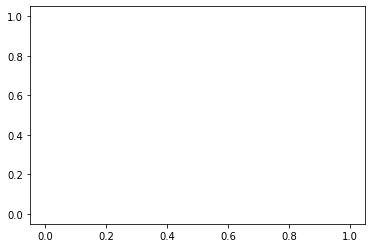

In [27]:
import seaborn as sns
print('^^^^^')
# fig = sns.regplot(data = df, x = 'date_time_cst', y = 'normalize15')
sns.scatterplot(x='normalize15', y='received_energy_kwh', hue ="zipcode", data=df);
print('@@@@@')

# print(fig)
print('ffffff')